# Assignment 5 Cleaning and exploratory data analysis

# Cleaning Data

It is commonly said that data scientists spend 80% of their time cleaning and manipulating data, and only 20% of their time actually analyzing it.
Before we dive into code, it’s important to understand the sources of missing data.  Here’s some typical reasons why data is missing:

1 User forgot to fill in a field.

2 Data was lost while transferring manually from a legacy database.

3 There was a programming error.

4 Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

As you can see, some of these sources are just simple random mistakes.  Other times, there can be a deeper reason why data is missing.

In [1]:
#Here we are importing relevant libraries for this tutorial.
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
%matplotlib inline

In [2]:
# Load the data into DataFrames
airbnb = pd.read_csv('C:/Users/yashu/Desktop/DS/AB_NYC_2019.csv')

In [3]:
#Here we can see the first 5 entries from the data set.
airbnb.head()


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
#This gives us the summary of the dataset
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
#Here we can see the number of rows and columns
airbnb.shape

(48895, 16)

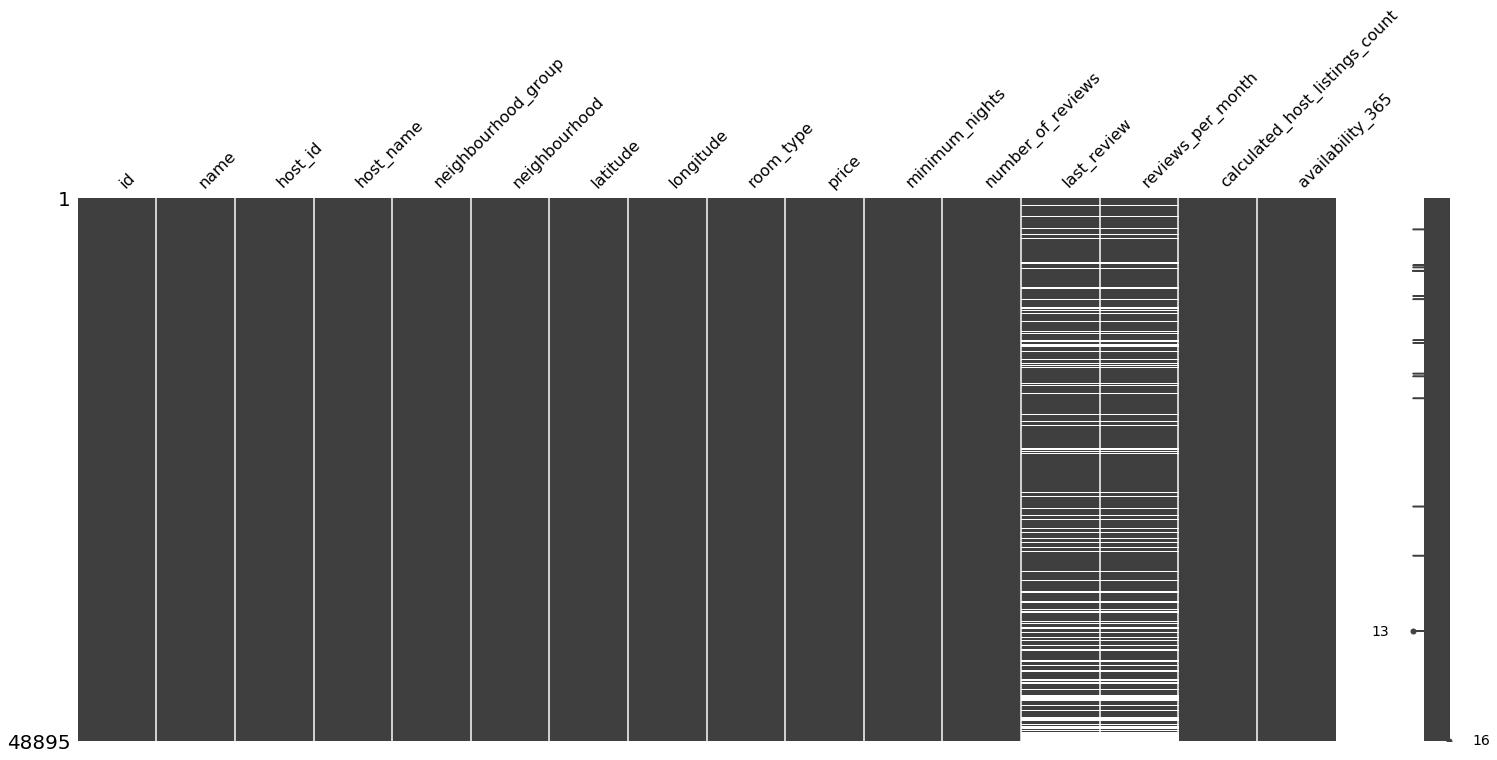

In [6]:
#From this graph we can visualize which column has missing values.
!pip install missingno
import missingno as msno
msno.matrix(airbnb)


In [7]:
#Here we are finding the missing values are there in each column of the dataset.
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
#We are replacing the missing values in name column with 'unknown'.
airbnb.name.fillna("unknown", inplace=True)

In [9]:
#Here we see that the name column is blank now as we have replaced the missing values.
airbnb.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
#We are replacing the missing values in neighbour group column with 'unknown'.
airbnb.host_name.fillna("unknown", inplace=True)

In [11]:
#Here we see that the host name column is blank now as we have replaced the missing values.
airbnb.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
#We are dropping the duplicate values.
airbnb.drop_duplicates(subset=None, keep='first', inplace=False)


id                                               name    host_id  \
0          2539                 Clean & quiet apt home by the park       2787   
1          2595                              Skylit Midtown Castle       2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !       4632   
3          3831                    Cozy Entire Floor of Brownstone       4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099          Large Cozy 1 BR Apartment In Midtown East       7322   
6          5121                                    BlissArtsSpace!       7356   
7          5178                   Large Furnished Room Near B'way        8967   
8          5203                 Cozy Clean Guest Room - Family Apt       7490   
9          5238                 Cute & Cozy Lower East Side 1 bdrm       7549   
10         5295                   Beautiful 1br on Upper West Side       7702   
11         5441                    Central Manhattan/near Broadway       7989   
12         5803     Lovely Room 1, Garden, Best Area, Legal rental       9744   
13         6021   Wonderful Guest Bedroom in Manhattan for SINGLES      11528   
14         6090                      West Village Nest - Superhost      11975   
15         6848                   Only 2 stops to Manhattan studio      15991   
16         7097                  Perfect for Your Parents + Garden      17571   
17         7322                                    Chelsea Perfect      18946   
18         7726    Hip Historic Brownstone Apartment with Backyard      20950   
19         7750                  Huge 2 BR Upper East  Cental Park      17985   
20         7801                   Sweet and Spacious Brooklyn Loft      21207   
21         8024                     CBG CtyBGd HelpsHaiti rm#1:1-4      22486   
22         8025                           CBG Helps Haiti Room#2.5      22486   
23         8110                              CBG Helps Haiti Rm #2      22486   
24         8490             MAISON DES SIRENES1,bohemian apartment      25183   
25         8505                 Sunny Bedroom Across Prospect Park      25326   
26         8700  Magnifique Suite au N de Manhattan - vue Cloitres      26394   
27         9357                               Midtown Pied-a-terre      30193   
28         9518       SPACIOUS, LOVELY FURNISHED MANHATTAN BEDROOM      31374   
29         9657                   Modern 1 BR / NYC / EAST VILLAGE      21904   
...         ...                                                ...        ...   
48865  36472171                      1 bedroom in sunlit apartment   99144947   
48866  36472710                                 CozyHideAway Suite  274225617   
48867  36473044    The place you were dreaming for.(only for guys)  261338177   
48868  36473253                       Heaven for you(only for guy)  261338177   
48869  36474023                        Cozy, Sunny Brooklyn Escape    1550580   
48870  36474911      Cozy, clean Williamsburg 1- bedroom apartment    1273444   
48871  36475746      A LARGE ROOM - 1 MONTH MINIMUM - WASHER&DRYER  144008701   
48872  36476675                                      Nycity-MyHome    8636072   
48873  36477307                                  Brooklyn paradise  241945355   
48874  36477588                   Short Term Rental in East Harlem  214535893   
48875  36478343                              Welcome all as family  274273284   
48876  36478357    Cozy, Air-Conditioned Private Bedroom in Harlem  177932088   
48877  36479230             Studio sized room with beautiful light   65767720   
48878  36479723                                      Room for rest   41326856   
48879  36480292  Gorgeous 1.5 Bdr with a private yard- Williams...     540335   
48880  36481315  The Raccoon Artist Studio in Williamsburg New ...  208514239   
48881  36481615                   Peaceful space in Greenpoint, BK  274298453   
48882  36482231                          Bus

In [13]:

#Here we are replacing all missing values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#This shows that the missing values are replaced
airbnb.reviews_per_month.isnull().sum()

0

In [14]:
#Since there missing values in last review column, and we are not using last review for further analysis , we prefer dropping the column.

airbnb.drop(['last_review'], axis=1, inplace=True)

In [15]:
#From the below table we can see that the last review table is dropped.
airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [16]:
#Now that the data has been cleaned , let us see some unique values of columns which we will require for analysis.

airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [17]:
airbnb.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [18]:
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a way for data analysis that states a variety of techniques,mainly graphical.

1) Maximize the insights into a particular data set

2) Detection of outliers and anomalies

3) Extraction of the important variables

4) Testing of the underlying assumptions

# Univariate

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

In [19]:
#Let us find the most preferred room type.
max_roomtype=airbnb.room_type.value_counts()
max_roomtype

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

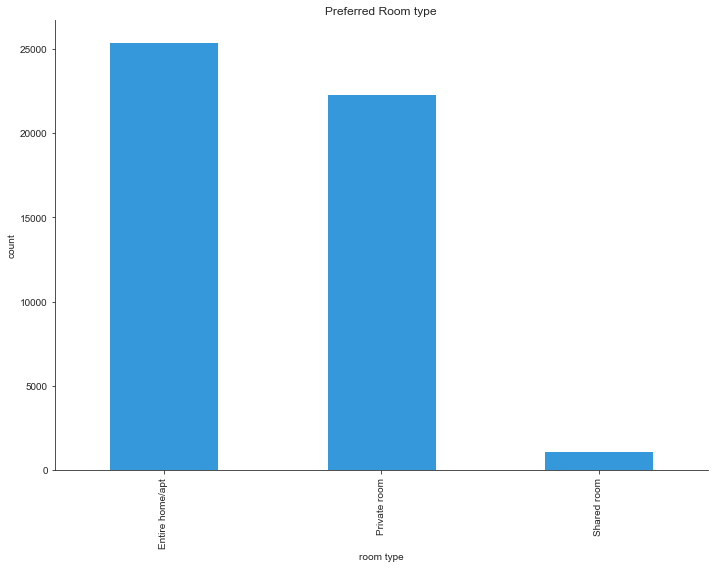

In [20]:
#Here we are using a bar graph to visualze the most preferred room type.
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
max_roomtype.plot(kind='bar',color='#3498DB')
plt.xlabel('room type')
plt.ylabel('count')
plt.title('Preferred Room type')
sns.despine()

In [21]:
#Let us find the most preferred neighbourhood.
pref_neigh=airbnb.neighbourhood_group.value_counts()
pref_neigh

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

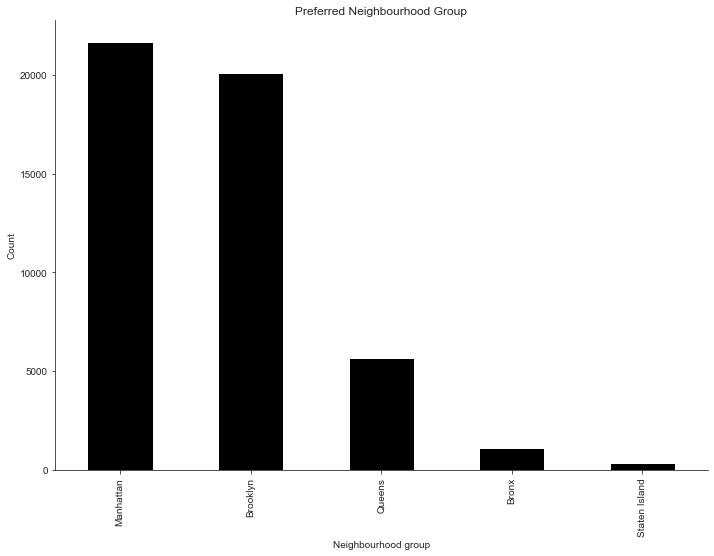

In [22]:
#Here we are using a bar graph to visualze the most preferred neighbourhood group type.
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
pref_neigh.plot(kind='bar',color='Black')
plt.xlabel('Neighbourhood group')
plt.ylabel('Count')
plt.title('Preferred Neighbourhood Group')
sns.despine()

In [23]:
#Here we find out which hosts (IDs) have the most listings on Airbnb.
top_host=airbnb.host_id.value_counts().head(20)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
26377263      43
2119276       39
19303369      37
25237492      34
119669058     34
Name: host_id, dtype: int64

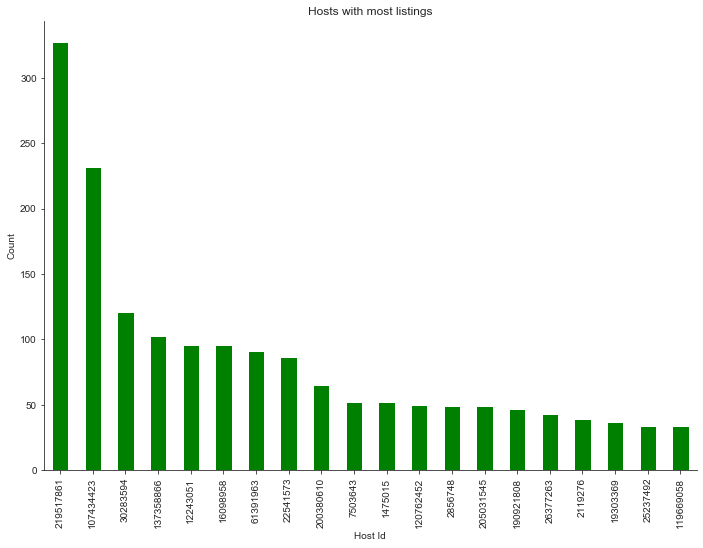

In [24]:
#Let us plot the top host using bar graph.
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
top_host.plot(kind='bar',color='Green')
plt.xlabel('Host Id')
plt.ylabel('Count')
plt.title('Hosts with most listings')
sns.despine()

In [25]:
#Let us find the most preferred neighbourhood.
pref_neigh2=airbnb.neighbourhood.value_counts().head(10)
pref_neigh2

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

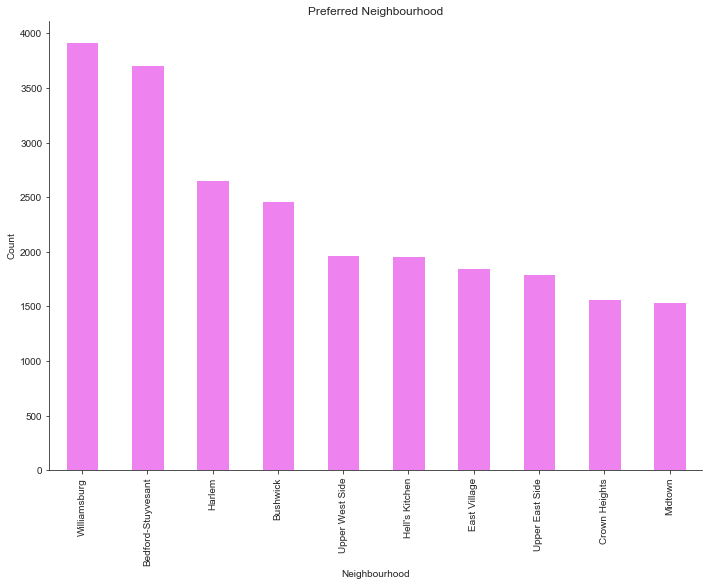

In [26]:
#Here we are using a bar graph to visualze the most preferred neighbourhood.
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
pref_neigh2.plot(kind='bar',color='Violet')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Preferred Neighbourhood')
sns.despine()

# Bivariate

Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.

In [40]:
#Here we will find out the mean, std and max price.
airbnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

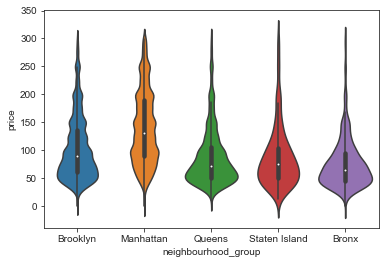

In [39]:
#Since the mean of the price is 152 we are making a subset of price i.e < 300.

price_subset=airbnb[airbnb.price < 300]
sns.violinplot(x='neighbourhood_group', y='price', data=price_subset, size=8)
plt.show()


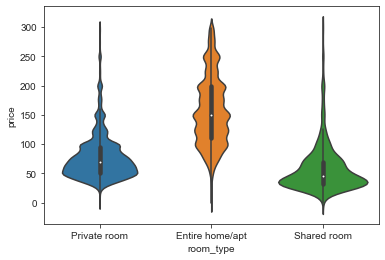

In [36]:
#Here we are plotting room type vs price.

price_subset=airbnb[airbnb.price < 300]
sns.violinplot(x='room_type', y='price', data=price_subset, size=8)
plt.show()


# Multivariate

Multivariate analysis (MVA) is based on the statistical principle of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

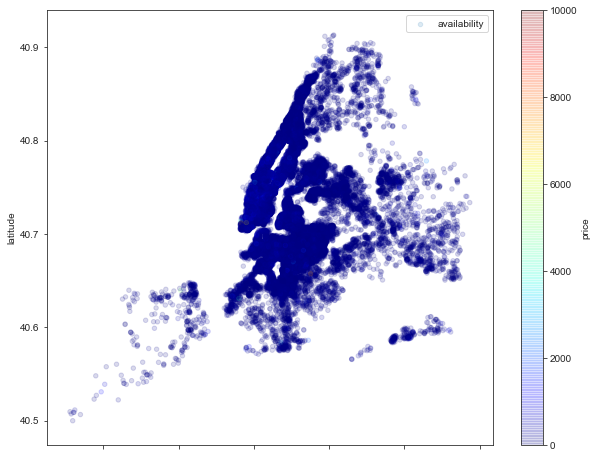

In [38]:
#This represents longitude and latitude across NYC and their price range.

pricevsneigh=airbnb.plot(kind='scatter', x='longitude', y='latitude', label='availability', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.15, figsize=(10,8))
pricevsneigh.legend()

References and Citations:

https://www.datacamp.com/community/

https://www.edureka.co/blog/exploratory-data-analysis-in-python
